<a href="https://colab.research.google.com/github/Gisellrom/ProyectoBEDU/blob/main/Suicidios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO: EL SUICIDIO EN EL SIGLO XXI

En 2017, un hombre a quien consideraba uno de los mejores músicos de todos los tiempos y autor, o coautor, de varias canciones que se habían convertido en la banda sonora de mi vida, se suicidó. Muchos se sorprendieron y muchos lo extrañan hoy.
En 2018, un hombre cuyos programas de televisión me mantuvieron repetidamente en un estado de respeto y fascinación por la diversidad del mundo, se suicidó. Muchos se sorprendieron y muchos lo extrañan hoy.

Según la OMS, cerca de 800.000 personas menos famosas mueren cada año por suicidio. Miré las Estadísticas de suicidio de la OMS para ver hacia dónde se dirige el mundo en su conjunto.

¿Está mejorando o empeorando? Verás mi respuesta a continuación.

Nota: haga lo que haga con los datos y las conclusiones que saque, nada de eso está aprobado ni respaldado por la OMS.

# Objetivo General

Analizar exhaustivamente la recopilación de índices de suicidios dentro de los 22 país, con el fin de comprender y visualizar patrones y posibles factores de riesgo asociados con el suicidio. Esto se logrará mediante el análisis y la representación gráfica de variables como edades, género y generación. Además, se buscará identificar los años en los que se registraron más suicidios y se relacionarán las tasas de suicidio con el per capital l de los países para comprender mejor su posible influencia en este fenómeno.

# Objetivos específicos
Nuestro colab busca responder las siguientes preguntas:

* ¿Cuál es el país con más indices de suicidio y en qué año se presentó el mayor número de muertes?

* ¿A qué edad se presentó el mayor número de suicidios y cuál es la generación más afectada?. Está incidencia es mayor ¿en hombres o mujeres?

* ¿El factor económico juega un papel importante de acuerdo con el número de suicidos registrados?



In [2]:
# Link original:
# https://www.kaggle.com/code/szamil/suicide-in-the-twenty-first-century/input

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Inicialización

Para comenzar, vamos a importar todas las librerías necesarias para la construcción correcta de las gráficas. En este caso, trabajaremos con las librerías `Pandas`, `Numpy` y `Seaborn` , que permiten leer correctamente los archivos, trabajar con bases de datos, trazar gráficos.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar datos

En segundo lugar, importamos los datasets con la información de los suicidios del siglo XXI. Para esto utilizaremos la función `read_csv` de pandas y pasaremos como argumento la ubicación del archivo. Guardaremos los datos en la variable `df`

In [5]:
# Leemos los datos
df = pd.read_csv('/content/drive/MyDrive/Proyecto BEDU/Dataset/master.csv', index_col=0)

# Procesamiento de datos

## Explorar datos iniciales

Con los datasets correctamente importados, ahora procedemos a realizar una exploración inicial de los datos. En este caso llamaremos al atributo `shape`, y los métodos `head` e `info` para el dataset.

In [6]:
#Tamaño del dataset
df.shape

(27820, 11)

In [7]:
#Verificamos que los datos esten cargados
df.head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27820 entries, Albania to Uzbekistan
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27820 non-null  int64  
 1   sex                 27820 non-null  object 
 2   age                 27820 non-null  object 
 3   suicides_no         27820 non-null  int64  
 4   population          27820 non-null  int64  
 5   suicides/100k pop   27820 non-null  float64
 6   country-year        27820 non-null  object 
 7   HDI for year        8364 non-null   float64
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.5+ MB


Revisamos el nombre de las columnas que tenemos en nuestro dataset, para verificar mejor si tenemos espacios vacios entre los nombres de las columnas:

In [9]:
 # Para ver las columnas que contiene el dataset
df.columns

Index(['year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'country-year', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

Desde este momento, podemos observar que la columna **country**, el dataset la está considerando como nuestro index, por lo que hay que cambiar de indice para analizar los datos que contiene:

In [10]:
# Convertir el índice en una columna
df = df.reset_index()
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Nuevamente, volvemos a checar todos los datos y verificamos que ya no se este considerando la columna "country" como el indice

In [11]:
df.shape

(27820, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


En el dataset nos encontramos con 27,820 filas u observaciones y 12 columnas que contienen la siguiente información:
* country: Indica el país en el que se registraron los datos sobre suicidios
* year: Indica el año en el que se registraron los datos sobre suicidios.
* sex: Refleja el género de las personas para las que se informan los datos (hombre o mujer).
* age: Representa los grupos de edad en los que se dividen los datos (por ejemplo, "15-24 años").
* suicidies_no: Indica el número total de suicidios reportados para la combinación de año, género y grupo de edad específicos.
* population: Muestra la población total para la combinación de año, género y grupo de edad específicos
* country-year: Combina la información sobre el país y el año para el cual se informan los datos.
* HDI for year: Representa el Índice de Desarrollo Humano (HDI) para el año correspondiente.
* gdp for year ($): Indica el Producto Interno Bruto (PIB) total para el año correspondiente.
* gdp per capita ($): Muestra el PIB per cápita para el año correspondiente.
* generation: ndica la generación de las personas para las que se informan los datos (por ejemplo, "Boomers", "Generation X").





Obervamos que la columna "HDI for year" se encuentra como tipo float, es correcto que pertenezca a ese tipo, pero encontramos que tiene información incompleta y además, información que no vamos a ocupar ya no está dentro de nuestros objetivos analizar como se comporta el indice de desarrollo humano, por eso directamente, procedemos a eliminar esa columna

In [13]:
# Eliminar la columna "HDI for year"
columna_a_eliminar = 'HDI for year'
df = df.drop(columna_a_eliminar, axis=1)

No obstante, también observamos que la columna **country-year** es de tipo objecto, ya que tiene información como una cadena y números enteros, pero esa información también se encuentran en las columnas **country** y **year**, con los tipos de datos correctos, por lo que también eliminamos la columna **country-year**, porque no es correcto que venga así la información sino que se trate por separado esa información.

In [14]:
# Elimina la columna "country-year"
columna_a_eliminar = 'country-year'
df = df.drop(columna_a_eliminar, axis=1)

In [15]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [16]:
# Elimina la columna "gdp_for_year ($)"
columna_a_eliminar = ' gdp_for_year ($) '
df = df.drop(columna_a_eliminar, axis=1)

In [17]:
# Elimina la columna "population"
columna_a_eliminar = 'population'
df = df.drop(columna_a_eliminar, axis=1)

In [18]:
# Elimina la columna "suicides/100k pop"
columna_a_eliminar = 'suicides/100k pop'
df = df.drop(columna_a_eliminar, axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             27820 non-null  object
 1   year                27820 non-null  int64 
 2   sex                 27820 non-null  object
 3   age                 27820 non-null  object
 4   suicides_no         27820 non-null  int64 
 5   gdp_per_capita ($)  27820 non-null  int64 
 6   generation          27820 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


Las columnas están en inglés, no es tan relevante, pero nosotras cambiaremos el nombre de las columnas, para analizar los datos con nuestro lenguaje natural. Además, quitaremos los espacios en blanco y simbolos que podrían causar ruido, que tienen algunas columnas como: **suicides/100k pop**, ** gdp for year ($)** y **gdp per capita ($)**:

In [20]:
# Renombramiento de columnas
column_name_mapping ={
    'country':'pais',
    'year':'año',
    'sex':'sexo',
    'age':'edad',
    'suicides_no':'no_suicidios',
    'gdp_per_capita ($)':'pib_per_capita',
    'generation':'generacion'
}

In [21]:
# Cambio de nombres
df = df.rename(columns=column_name_mapping)
df.head()

,pais,año,sexo,edad,no_suicidios,pib_per_capita,generacion
0,Albania,1987,male,15-24 years,21,796,Generation X
1,Albania,1987,male,35-54 years,16,796,Silent
2,Albania,1987,female,15-24 years,14,796,Generation X
3,Albania,1987,male,75+ years,1,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,796,Boomers


Dentro de la información de la columna **generacion**, observamos que la palabra "Generación" se repite constantemente, entonces procedemos a eliminar esa palabra repetida, ya que el nombre de la columna indica que se habla de las generaciones.

In [22]:
#Eliminar la palabra "Generation" de la columna 'generacion'
df['generacion']=df['generacion'].str.replace('Generation', '')

df.head()

,pais,año,sexo,edad,no_suicidios,pib_per_capita,generacion
0,Albania,1987,male,15-24 years,21,796,X
1,Albania,1987,male,35-54 years,16,796,Silent
2,Albania,1987,female,15-24 years,14,796,X
3,Albania,1987,male,75+ years,1,796,G.I.
4,Albania,1987,male,25-34 years,9,796,Boomers


In [23]:
df.dtypes

pais              object
año                int64
sexo              object
edad              object
no_suicidios       int64
pib_per_capita     int64
generacion        object
dtype: object

Luego, observamos que la columna **age** es de tipo objeto, y debería de ser de tipo entero ya que la edad es numérica, pero esto se debe a que en la información que tiene la columna, tiene la palabra **years**, entonces también procedemos a eliminarla.

In [24]:
#Eliminar "years" de la columna edad

df['edad']=df['edad'].str.replace(' years', '')

df.head()

,pais,año,sexo,edad,no_suicidios,pib_per_capita,generacion
0,Albania,1987,male,15-24,21,796,X
1,Albania,1987,male,35-54,16,796,Silent
2,Albania,1987,female,15-24,14,796,X
3,Albania,1987,male,75+,1,796,G.I.
4,Albania,1987,male,25-34,9,796,Boomers


In [25]:
df.dtypes

pais              object
año                int64
sexo              object
edad              object
no_suicidios       int64
pib_per_capita     int64
generacion        object
dtype: object

Notamos que apesar de que ya se eliminó la palabra "years", sigue considerando la columna "edad" como objeto, ya que también contiene símbolos como **+** y **-**. Para lidiar con este problema, lo vamos a dejar como objeto y lo vamos a considerar como si fuera una variable categórica

Luego, vamos a cambiar "male" y "female" de la columna sexo a una abreviatura más cómoda.

In [26]:
#Cambiar "male" y "female" de la columna sexo
# \b para representar límites de palabras
df['sexo']=df['sexo'].str.replace(r'\bmale\b', 'M', case= False)
df['sexo']=df['sexo'].str.replace(r'\bfemale\b', 'F', case= False)
df.head()

<ipython-input-26-1c2770f12575>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sexo']=df['sexo'].str.replace(r'\bmale\b', 'M', case= False)
<ipython-input-26-1c2770f12575>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sexo']=df['sexo'].str.replace(r'\bfemale\b', 'F', case= False)


,pais,año,sexo,edad,no_suicidios,pib_per_capita,generacion
0,Albania,1987,M,15-24,21,796,X
1,Albania,1987,M,35-54,16,796,Silent
2,Albania,1987,F,15-24,14,796,X
3,Albania,1987,M,75+,1,796,G.I.
4,Albania,1987,M,25-34,9,796,Boomers


Por último en nuestra limpieza de datos, verificamos que no haya NANs en nuestro dataset con `isna()` y `sum()` para contabilizarlos:

In [27]:
#Contabiliza las NANs
df.isna().sum(axis=0)

pais              0
año               0
sexo              0
edad              0
no_suicidios      0
pib_per_capita    0
generacion        0
dtype: int64

Por lo que notamos que no hay NANs en nuestro dataset en cada una de las columnas, por lo que ya podemos graficar y hacer uso de los datos.

In [28]:
df.dtypes

pais              object
año                int64
sexo              object
edad              object
no_suicidios       int64
pib_per_capita     int64
generacion        object
dtype: object

Datos numéricos:
- año
- no_suicidios
- población (No es tan relevante)
- pib anual
- pib_per_capita  (No es tan relevante)

# Análisis de datos con Python

## Estimados de locación y Variabilidad

Para utilizar los estimados de locaclión y variabilidad, lo que hacemos es utilizar `info()` para identificar los datos númericos

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pais            27820 non-null  object
 1   año             27820 non-null  int64 
 2   sexo            27820 non-null  object
 3   edad            27820 non-null  object
 4   no_suicidios    27820 non-null  int64 
 5   pib_per_capita  27820 non-null  int64 
 6   generacion      27820 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


Observamos que las columnas que tienen datos númericos son:

* año
* no_suicidios
* pib_per_capita

Pero las columnas que nos van ayudar a responder las preguntas van hacer:
* año
* no_suicidios
* pib_per_capita

Por lo que vamos a obtener los siguientes estimados de tus columnas numéricas:
* Promedio
* Mediana
* Media Truncada
* Desviación estándar
* Rango
* Percentiles 25 y 75 (por lo menos)
* Rango intercuartil

## Año (Lesly)

Promedio

In [30]:
#para imprimir el promedio con formato:
formatted_año = "{:.0f}".format(df['año'].mean())
print(formatted_año)

2001


Media

In [31]:
formatted_año = "{:.0f}".format(df['año'].median())
print(formatted_año)

2002


Media Truncada

In [32]:
from scipy import stats #funcionalidad de estadisticas

In [33]:
#truncar el valor promedio de la columna de año  con el porcentaje, 5% a la izquierda y 5% a la dereha, es decir el 10% en total
media_truncada = stats.trim_mean(df['año'], 0.1)
print(f'Media Recortada: {media_truncada:.0f}')

Media Recortada: 2001


In [34]:
correct_año_mean = df['año'].mean() #Promedio
correct_año_median = df['año'].median() #Mediana
correct_año_mode = df['año'].mode()[0] #Moda

print("Media: {:.0f}, \nMediana: {:.0f}, \nModa: {:.0f}".format(correct_año_mean, correct_año_median, correct_año_mode))

Media: 2001, 
Mediana: 2002, 
Moda: 2009


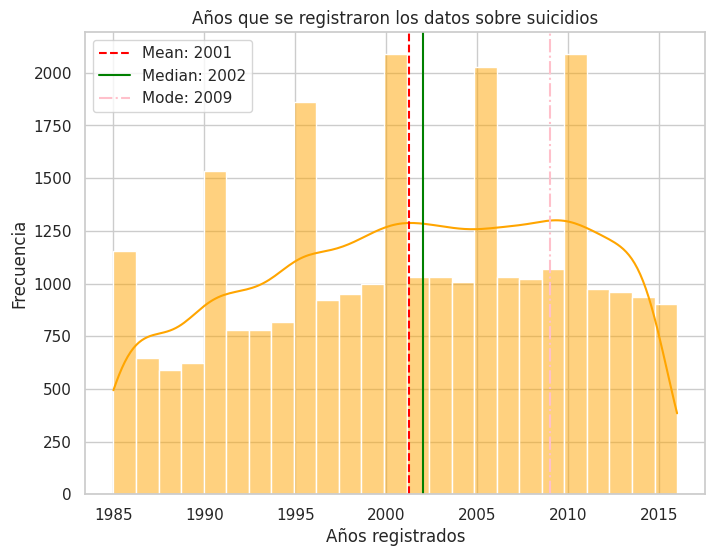

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Plotting the distribution of the 'año' column
plt.figure(figsize=(8, 6))
sns.histplot(df['año'], kde=True, bins=25, color='orange')

# Plotting the mean, median, and mode
plt.axvline(correct_año_mean, color='red', linestyle='--', label=f'Mean: {correct_año_mean:.0f}')
plt.axvline(correct_año_median, color='green', linestyle='-', label=f'Median: {correct_año_median:.0f}')
plt.axvline(correct_año_mode, color='pink', linestyle='-.', label=f'Mode: {correct_año_mode:.0f}')

# Adding title and labels
plt.title('Años que se registraron los datos sobre suicidios')
plt.xlabel('Años registrados')
plt.ylabel('Frecuencia')
plt.legend()

# Show the plot
plt.show()

## Desviación estandar

In [36]:
standar_deviation=df['año'].std()

In [37]:
print("Media: {:.0f}, \nMediana: {:.0f}, \nModa: {:.0f}".format(correct_año_mean, correct_año_median, correct_año_mode))
print("Des Est: {:,.0f}".format(standar_deviation))

Media: 2001, 
Mediana: 2002, 
Moda: 2009
Des Est: 8


## Rango

In [38]:
año_range = df['año'].max() - df['año'].min()
formatted_año_range = f'{año_range:,.0f}'
print(formatted_año_range)

31


### Percentiles 25 y 75

In [39]:
print(f'Valor mínimo: {df["año"].min():.0f}')
print(f'Percentil 10: {df["año"].quantile(0.1):.0f}')
print(f'Percentil 25: {df["año"].quantile(0.25):.0f}')
print(f'Percentil 50: {df["año"].median():.0f}')
print(f'Percentil 75: {df["año"].quantile(0.75):.0f}')
print(f'Percentil 90: {df["año"].quantile(0.9):.0f}')
print(f'Valor máximo: {df["año"].max():.0f}')

Valor mínimo: 1985
Percentil 10: 1989
Percentil 25: 1995
Percentil 50: 2002
Percentil 75: 2008
Percentil 90: 2013
Valor máximo: 2016


## Rango intercuartil

In [40]:
interquartile_range = df["año"].quantile(0.75) - df["año"].quantile(0.25)
formatted_interquartile_range = f'{interquartile_range:.0f}'
print(formatted_interquartile_range)

13


## no_suicidios (Miriam)

In [41]:
# Eliminar filas donde 'no_suicidios' es igual a 0
df = df.loc[df['no_suicidios'] != 0]

#### Promedio:

In [42]:
no_suicidios = "{:,.0f}".format(df['no_suicidios'].mean())
print(no_suicidios)

287


#### Mediana

In [43]:
no_suicidios = "{:,.0f}".format(df['no_suicidios'].median())
print(no_suicidios)

42


#### Media Truncada

In [44]:
from scipy import stats #funcionalidad de estadisticas

In [45]:
#truncar el valor promedio de la columna no_suicidios con el porcentaje, 5% a la izquierda y 5% a la dereha, es decir el 10% en total
media_truncada = stats.trim_mean(df['no_suicidios'], 0.1)
print(f'Media Truncada: {media_truncada:,.0f}')

Media Truncada: 98


In [46]:
correct_no_suicidios_mean = df['no_suicidios'].mean() #Promedio
correct_no_suicidios_median = df['no_suicidios'].median() #Mediana
correct_no_suicidios_mode = df['no_suicidios'].mode()[0] #Moda

print("Media: {:,.0f}, \nMediana: {:,.0f}, \nModa: {:,.0f}".format(correct_no_suicidios_mean, correct_no_suicidios_median, correct_no_suicidios_mode))

Media: 287, 
Mediana: 42, 
Moda: 1


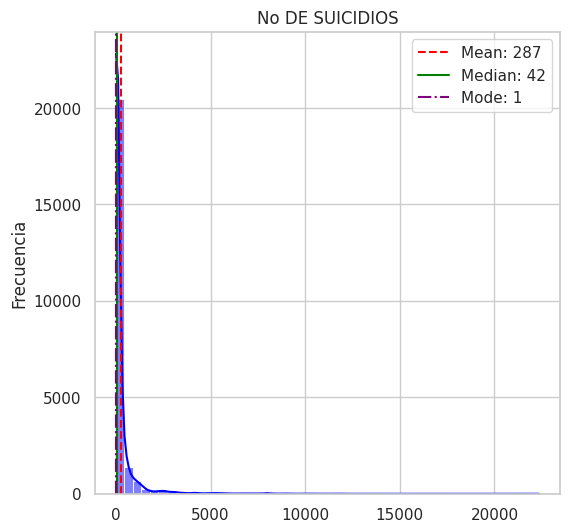

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Plotting the distribution of the 'price' column
plt.figure(figsize=(6, 6))
sns.histplot(df['no_suicidios'], kde=True, bins=50, color='blue')

# Plotting the mean, median, and mode
plt.axvline(correct_no_suicidios_mean, color='red', linestyle='--', label=f'Mean: {correct_no_suicidios_mean:,.0f}')
plt.axvline(correct_no_suicidios_median, color='green', linestyle='-', label=f'Median: {correct_no_suicidios_median:,.0f}')
plt.axvline(correct_no_suicidios_mode, color='purple', linestyle='-.', label=f'Mode: {correct_no_suicidios_mode:,.0f}')

# Adding title and labels
plt.title('No DE SUICIDIOS')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.legend()

# Show the plot
plt.show()

#### Desviación estándar

In [48]:
standar_deviation=df['no_suicidios'].std()

In [49]:
print("Media: {:,.0f}, \nMediana: {:,.0f}, \nModa: {:,.0f}".format(correct_no_suicidios_mean, correct_no_suicidios_median, correct_no_suicidios_mode))
print("Des Est: {:,.0f}".format(standar_deviation))

Media: 287, 
Mediana: 42, 
Moda: 1
Des Est: 974


#### Rango

In [50]:
no_suicidios_range = df['no_suicidios'].max() - df['no_suicidios'].min()
formatted_no_suicidios_range = f'{no_suicidios_range:,.0f}'
print(formatted_no_suicidios_range)

22,337


#### Percentiles 25 y 75

In [51]:
print(f'Valor mínimo: {df["no_suicidios"].min():,.0f}')
print(f'Percentil 10: {df["no_suicidios"].quantile(0.1):,.0f}')
print(f'Percentil 25: {df["no_suicidios"].quantile(0.25):,.0f}')
print(f'Percentil 50: {df["no_suicidios"].median():,.0f}')
print(f'Percentil 75: {df["no_suicidios"].quantile(0.75):,.0f}')
print(f'Percentil 90: {df["no_suicidios"].quantile(0.9):,.0f}')
print(f'Valor máximo: {df["no_suicidios"].max():,.0f}')

Valor mínimo: 1
Percentil 10: 2
Percentil 25: 8
Percentil 50: 42
Percentil 75: 175
Percentil 90: 607
Valor máximo: 22,338


#### Rango intercuartil

In [52]:
interquartile_range = df["no_suicidios"].quantile(0.75) - df["no_suicidios"].quantile(0.25)
formatted_interquartile_range = f'{interquartile_range:,.0f}'
print(formatted_interquartile_range)

167


## pib anual (Gisell)

#### Promedio:

In [53]:
#Para imprimir el promedio con formato:
formatted_pib_per_capita = "$ {:,.3f}".format(df['pib_per_capita'].mean())
print(formatted_pib_per_capita)

$ 17,229.712


#### Mediana

In [54]:
formatted_pib_per_capita = "$ {:,.3f}".format(df['pib_per_capita'].median())
print(formatted_pib_per_capita)

$ 9,667.000


#### Mediana truncada

In [55]:
from scipy import stats #funcionalidad de estadisticas

In [56]:
#truncar el valor promedio de la columna de price con el porcentaje, 5% a la izquierda y 5% a la dereha, es decir el 10% en total
media_truncada = stats.trim_mean(df['pib_per_capita'], 0.1)
print(f'Media Recortada: ${media_truncada:,.3f}')

Media Recortada: $13,813.279


In [57]:
correct_pib_per_capita_mean = df['pib_per_capita'].mean() #Promedio
correct_pib_per_capita_median = df['pib_per_capita'].median() #Mediana
correct_pib_per_capita_mode = df['pib_per_capita'].mode()[0] #Moda

print("Media: ${:,.3f}, \nMediana: ${:,.3f}, \nModa: ${:,.3f}".format(correct_pib_per_capita_mean, correct_pib_per_capita_median, correct_pib_per_capita_mode))

Media: $17,229.712, 
Mediana: $9,667.000, 
Moda: $2,303.000


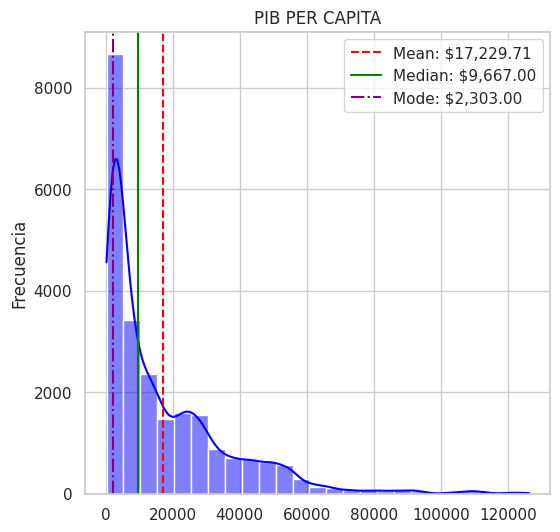

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Plotting the distribution of the 'price' column
plt.figure(figsize=(6, 6))
sns.histplot(df['pib_per_capita'], kde=True, bins=25, color='blue')

# Plotting the mean, median, and mode
plt.axvline(correct_pib_per_capita_mean, color='red', linestyle='--', label=f'Mean: ${correct_pib_per_capita_mean:,.2f}')
plt.axvline(correct_pib_per_capita_median, color='green', linestyle='-', label=f'Median: ${correct_pib_per_capita_median:,.2f}')
plt.axvline(correct_pib_per_capita_mode, color='purple', linestyle='-.', label=f'Mode: ${correct_pib_per_capita_mode:,.2f}')

# Adding title and labels
plt.title('PIB PER CAPITA')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.legend()

# Show the plot
plt.show()

#### Desviación estandar

In [59]:
standar_deviation=df['pib_per_capita'].std()

In [60]:
print("Media: ${:,.3f}, \nMediana: ${:,.3f}, \nModa: ${:,.3f}".format(correct_pib_per_capita_mean, correct_pib_per_capita_median, correct_pib_per_capita_mode))
print("Des Est: ${:,.3f}".format(standar_deviation))

Media: $17,229.712, 
Mediana: $9,667.000, 
Moda: $2,303.000
Des Est: $19,107.378


#### Rango

In [61]:
pib_per_capita_range = df['pib_per_capita'].max() - df['pib_per_capita'].min()
formatted_pib_per_capita_range = f'${pib_per_capita_range:,.2f}'
print(formatted_pib_per_capita_range)

$126,101.00


#### Percentiles 25 y 75

In [62]:
print(f'Valor mínimo: ${df["pib_per_capita"].min():,.2f}')
print(f'Percentil 10: ${df["pib_per_capita"].quantile(0.1):,.2f}')
print(f'Percentil 25: ${df["pib_per_capita"].quantile(0.25):,.2f}')
print(f'Percentil 50: ${df["pib_per_capita"].median():,.2f}')
print(f'Percentil 75: ${df["pib_per_capita"].quantile(0.75):,.2f}')
print(f'Percentil 90: ${df["pib_per_capita"].quantile(0.9):,.2f}')
print(f'Valor máximo: ${df["pib_per_capita"].max():,.2f}')

Valor mínimo: $251.00
Percentil 10: $1,423.00
Percentil 25: $3,293.00
Percentil 50: $9,667.00
Percentil 75: $25,735.00
Percentil 90: $44,491.00
Valor máximo: $126,352.00


#### Rango intercuartil

In [63]:
interquartile_range = df["pib_per_capita"].quantile(0.75) - df["pib_per_capita"].quantile(0.25)
formatted_interquartile_range = f'${interquartile_range:,.2f}'
print(formatted_interquartile_range)

$22,442.00


## Introducción a la visualización de datos: Distribuciones

* Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.
* Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.
* Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.
* Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

## Año (Lesly)

Text(0.5, 1.0, 'años')

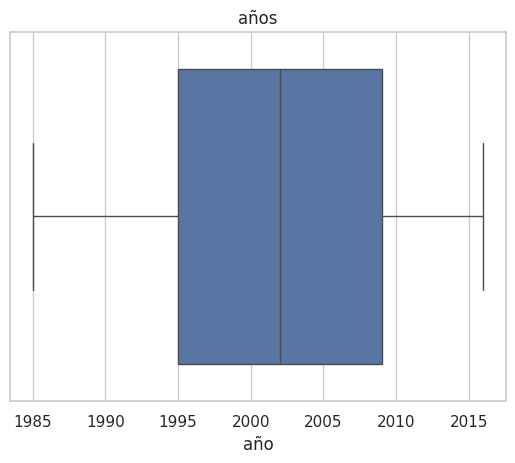

In [64]:
sns.set(style="whitegrid") #estilo de la grafica
sns.boxplot(x=df['año']) #Ponemos la grafica y escogemos la columna año
plt.title("años") #Agregamos un titulo

#no_suicidios (Miriam)

#### Boxplots

Text(0.5, 1.0, 'No DE SUICIDIOS')

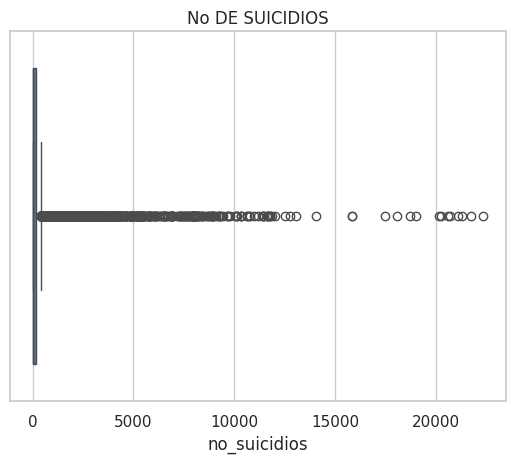

In [65]:
sns.set(style="whitegrid") #estilo de la grafica
sns.boxplot(x=df['no_suicidios']) #Ponemos la grafica y escogemos la columna no_suicidios
plt.title("No DE SUICIDIOS") #Agregamos un titulo

In [66]:
#Se calcula el rango intercuartílico:
# que es la diferencia del percentil 75 y percentil 25
iqr = df['no_suicidios'].quantile(0.75) - df['no_suicidios'].quantile(0.25)

#se hace un filtrado de los datos para eliminar los valores atipicos considerando los limites inferiores y superiores
filtro_inferior = df['no_suicidios'] > df['no_suicidios'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['no_suicidios'] < df['no_suicidios'].quantile(0.75) + (iqr * 1.5)

df2_filtrado = df[filtro_inferior & filtro_superior]

Text(0.5, 1.0, 'No DE SUICIDIOS')

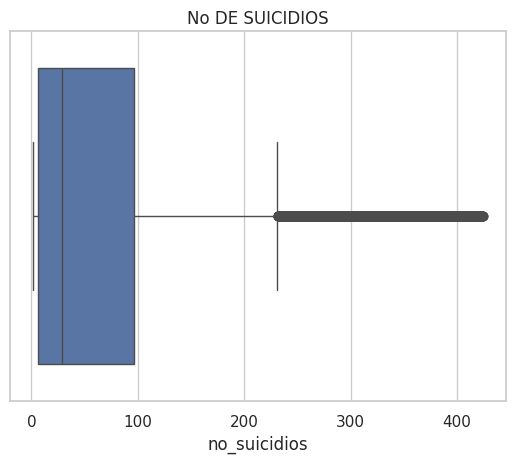

In [67]:
sns.set(style="whitegrid") #estilo de la grafica
sns.boxplot(x=df2_filtrado['no_suicidios']) #Ponemos la grafica y escogemos la columna no_suicidios
plt.title("No DE SUICIDIOS") #Agregamos un titulo

## pib anual (Gisell)

#### Boxplots

Text(0.5, 1.0, 'PIB PER CAPITA')

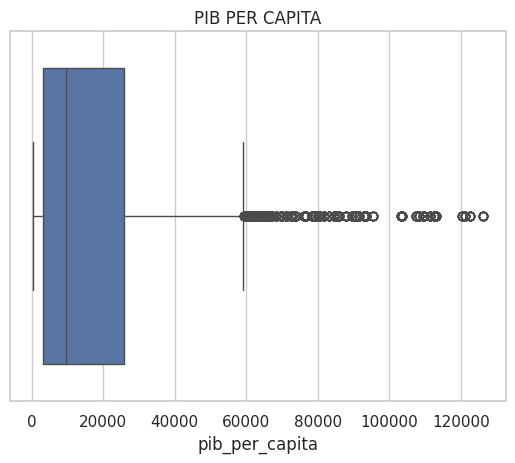

In [68]:
sns.set(style="whitegrid") #estilo de la grafica
sns.boxplot(x=df['pib_per_capita']) #Ponemos la grafica y escogemos la columna price
plt.title("PIB PER CAPITA") #Agregamos un titulo

Observamos que tenemos valores atípicos, los cuales nos están estorbando en nuestro análisis. Por lo que proceedemos a eliminarlos usando el Score de Rango Intercuartílico.

In [69]:
#Se calcula el rango intercuartílico:
# que es la diferencia del percentil 75 y percentil 25
iqr = df['pib_per_capita'].quantile(0.75) - df['pib_per_capita'].quantile(0.25)

#se hace un filtrado de los datos para eliminar los valores atipicos considerando los limites inferiores y superiores
filtro_inferior = df['pib_per_capita'] > df['pib_per_capita'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['pib_per_capita'] < df['pib_per_capita'].quantile(0.75) + (iqr * 1.5)

df3_filtrado = df[filtro_inferior & filtro_superior]

Text(0.5, 1.0, 'PIB PER CAPITA')

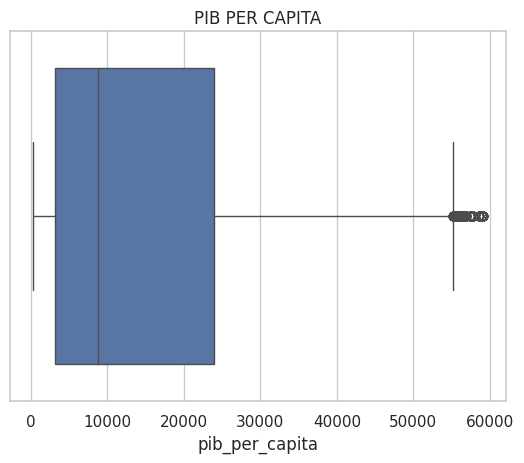

In [70]:
sns.set(style="whitegrid") #estilo de la grafica
sns.boxplot(x=df3_filtrado['pib_per_capita']) #Ponemos la grafica y escogemos la columna price
plt.title("PIB PER CAPITA") #Agregamos un titulo

## Exploración de Variables Categóricas y Análisis Multivariable

* Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
* Identifica todas las variables categóricas en tu dataset.
* Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
* Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
* Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
* Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
* De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.

Identifica todas las variables categóricas en tu dataset.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23539 entries, 0 to 27819
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pais            23539 non-null  object
 1   año             23539 non-null  int64 
 2   sexo            23539 non-null  object
 3   edad            23539 non-null  object
 4   no_suicidios    23539 non-null  int64 
 5   pib_per_capita  23539 non-null  int64 
 6   generacion      23539 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


Nuestras variables categóricas son:
* pais
* sexo
* edad
* generación

### Grafica de barras

#### Pais (Lesly)

In [72]:
sns.set_style('white')

In [73]:
df['pais'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea',
       'Romania', 'Russian Fede

In [74]:
counts = df['pais'].value_counts()
print(counts)

Netherlands            378
Austria                373
Ecuador                372
Argentina              372
United States          372
                      ... 
Mongolia                10
Antigua and Barbuda     10
Cabo Verde               9
Macau                    9
San Marino               4
Name: pais, Length: 99, dtype: int64


In [75]:
# Calcular la frecuencia de cada valor único
counts = df['pais'].value_counts()
print(counts)

Netherlands            378
Austria                373
Ecuador                372
Argentina              372
United States          372
                      ... 
Mongolia                10
Antigua and Barbuda     10
Cabo Verde               9
Macau                    9
San Marino               4
Name: pais, Length: 99, dtype: int64


<ipython-input-76-de17bfc158fe>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['pais'], kde=False, norm_hist=False)


ValueError: could not convert string to float: 'Albania'

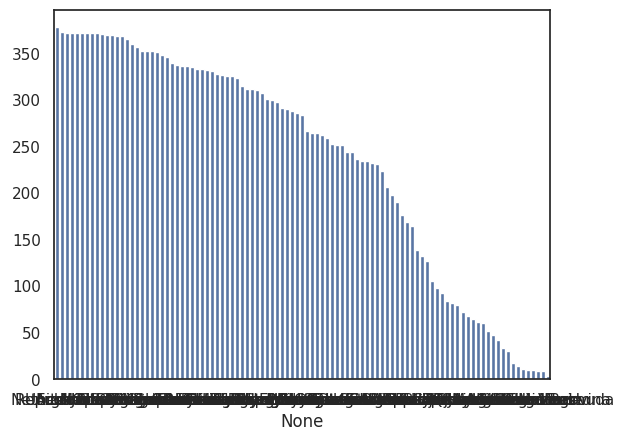

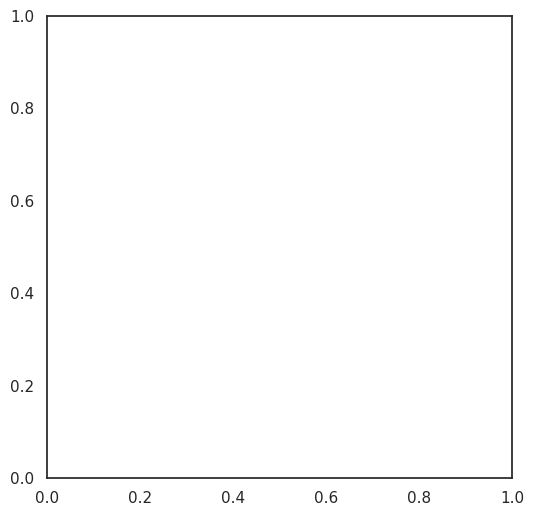

In [76]:
# Crear un gráfico de barras con Seaborn
ax = sns.barplot(x=counts.index, y=counts.values)

# Configurar el título y las etiquetas
fig = plt.figure(figsize= (6,6))
ax = sns.distplot(df['pais'], kde=False, norm_hist=False)
ax.set(title='conteo de suicidio por pais', xlabel='edad', ylabel='conteo');

#### Sexo (Miriam)

In [79]:
sns.set_style('white')

In [80]:
df['sexo'].unique()

array(['M', 'F'], dtype=object)

In [81]:
counts = df['sexo'].value_counts()
print(counts)

M    12286
F    11253
Name: sexo, dtype: int64


In [82]:
#Cambio de conteos a porcentajes
as_percentages = (counts * 100) / counts.sum() # Funcion vectorizada, Funcion de Agregacion.
print(as_percentages)

M    52.194231
F    47.805769
Name: sexo, dtype: float64


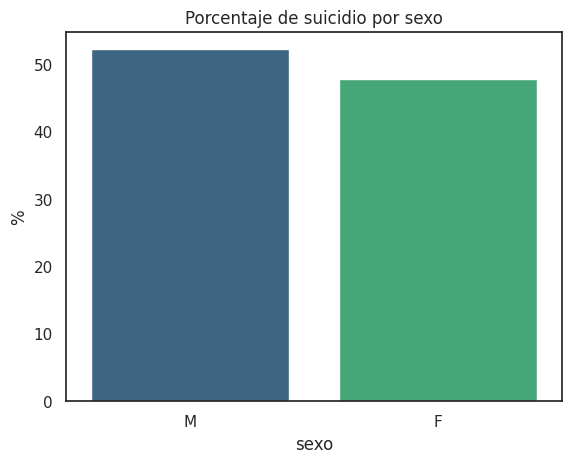

In [83]:
 #Crear un gráfico de barras con Seaborn
ax = sns.barplot(x=as_percentages.index, y=as_percentages.values, hue=as_percentages.index, palette='viridis')

# Configurar el título y las etiquetas
ax.set_title('Porcentaje de suicidio por sexo')
ax.set(xlabel= "sexo", ylabel='%')

# Mostrar el gráfico
plt.show()

#### edad (Gisell)

In [84]:
sns.set_style('white')

Identificamos los valores únicos de los datos que tenemos en la columna de edades

In [85]:
df['edad'].unique()

array(['15-24', '35-54', '75+', '25-34', '55-74', '5-14'], dtype=object)

Luego, calculamos la frecuencia de cada valor único de la columna de edades

In [86]:
# Calcular la frecuencia de cada valor único
counts = df['edad'].value_counts()
print(counts)

35-54    4272
25-34    4191
15-24    4131
55-74    4083
75+      3720
5-14     3142
Name: edad, dtype: int64


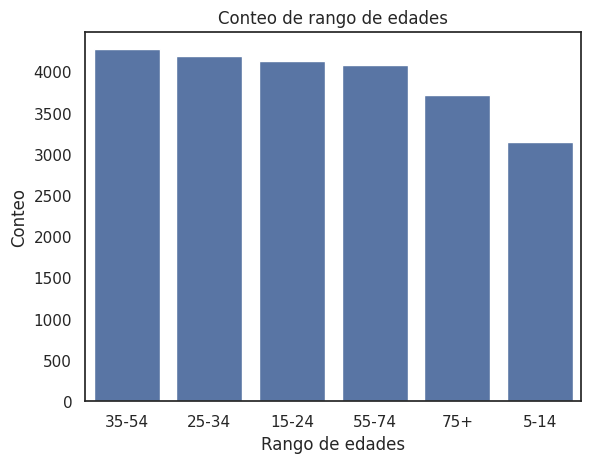

In [87]:
# Crear un gráfico de barras con Seaborn
ax = sns.barplot(x=counts.index, y=counts.values)

# Configurar el título y las etiquetas
ax.set_title('Conteo de rango de edades')
ax.set(xlabel= "Rango de edades", ylabel='Conteo')

# Mostrar el gráfico
plt.show()

#### generación

In [88]:
df['generacion'].unique()

array([' X', 'Silent', 'G.I. ', 'Boomers', 'Millenials', ' Z'],
      dtype=object)

In [89]:
# Calcular la frecuencia de cada valor único
counts = df['generacion'].value_counts()
print(counts)

 X            5638
Silent        5382
Millenials    4716
Boomers       4568
G.I.          2251
 Z             984
Name: generacion, dtype: int64


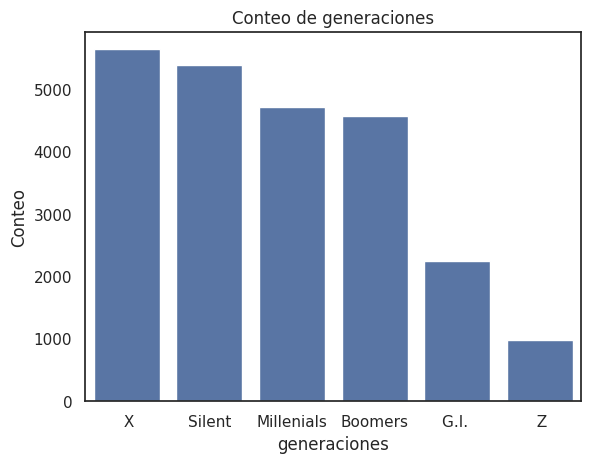

In [90]:
# Crear un gráfico de barras con Seaborn
ax = sns.barplot(x=counts.index, y=counts.values)

# Configurar el título y las etiquetas
ax.set_title('Conteo de generaciones')
ax.set(xlabel= "generaciones", ylabel='Conteo')

# Mostrar el gráfico
plt.show()

Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos?

Las combinaciones de variables que nos darían inforamión sería:
* sexo - rango de edades
* sexo - generación
* rango de edades - generación

Realizar tablas de contingencia y múltiples gráficas

#### sexo - rango de edades (Lesly)

In [91]:
pd.crosstab(df['sexo'], df['edad'], margins=True, margins_name='total')

edad,15-24,25-34,35-54,5-14,55-74,75+,total
sexo,,,,,,,
F,1987,2025,2052,1463,1964,1762,11253
M,2144,2166,2220,1679,2119,1958,12286
total,4131,4191,4272,3142,4083,3720,23539


#### sexo - generación (Miriam)

In [93]:
pd.crosstab(df['sexo'], df['generacion'],margins=True, margins_name='Total')

generacion,X,Z,Boomers,G.I.,Millenials,Silent,Total
sexo,,,,,,,
F,2710,455,2201,1073,2247,2567,11253
M,2928,529,2367,1178,2469,2815,12286
Total,5638,984,4568,2251,4716,5382,23539


#### rango de edades - generación  (Gisell)

In [94]:
# Podemos obtener una columna y una fila con los totales añadiendo la bandera margins y margins_name:
crosstab = pd.crosstab(df['edad'], df['generacion'],margins=True, margins_name='Total')
crosstab

generacion,X,Z,Boomers,G.I.,Millenials,Silent,Total
edad,,,,,,,
15-24,1891,0,0,0,2240,0,4131
25-34,2414,0,1041,0,736,0,4191
35-54,915,0,2796,0,0,561,4272
5-14,418,984,0,0,1740,0,3142
55-74,0,0,731,532,0,2820,4083
75+,0,0,0,1719,0,2001,3720
Total,5638,984,4568,2251,4716,5382,23539


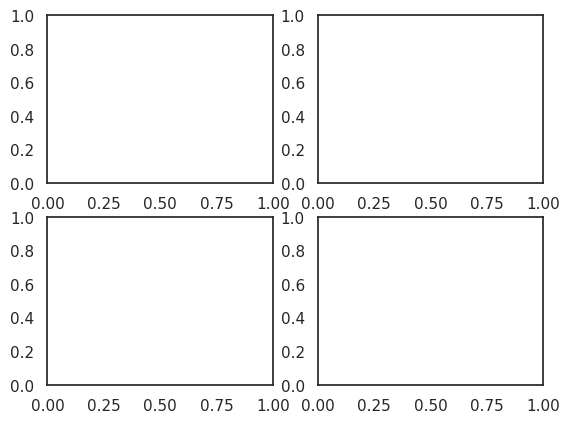

In [95]:
# figure es el objeto que contiene nuestras gráficas, los objetos axes son los encargados de dibujar cada una de las gráficas.
# figure contiene axes y nuestras gráficas se dibujan sobre los axes.

# Usando el método subplots, podemos generar al mismo tiempo una nueva figura y múltiples axes que están contenidos en esa figura:
fig, axes =plt.subplots(2, 2)

In [96]:
sns.set_style('whitegrid')

#crosstab = pd.crosstab(df['edad'],[df['sexo'], df['generacion']])
#crosstab

In [ ]:
fig, axes=  plt.subplots(2,2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x=crosstab.columns, y=crosstab.loc[1], ax=axes[0, 0, 0], hue=crosstab.columns, palette="coolwarm", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc[2], ax=axes[0, 0, 1], hue=crosstab.columns, palette="seismic", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc[3], ax=axes[0, 1, 0], hue=crosstab.columns, palette="RdYlGn", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc[4], ax=axes[0, 1, 1], hue=crosstab.columns, palette="BrBG", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc[5], ax=axes[1, 0, 0], hue=crosstab.columns, palette="coolwarm", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc[6], ax=axes[1, 0, 1], hue=crosstab.columns, palette="seismic", legend=False)
sns.barplot(x=crosstab.columns, y=crosstab.loc[7], ax=axes[1, 1, 0], hue=crosstab.columns, palette="RdYlGn", legend=False)


axes[0, 0].set(xlabel='', ylabel='', title='Rango de Precio: 1')
axes[0, 1].set(xlabel='', ylabel='', title='Rango de Precio: 2')
axes[1, 0].set(xlabel='', ylabel='', title='Rango de Precio: 3')
axes[1, 1].set(xlabel='', ylabel='', title='Rango de Precio: 4')

fig.suptitle('Ratings de restaurantes separados por rango de precio', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el layout para acomodar el título superior, tuple (left, bottom, right, top), default: (0, 0, 1, 1)


¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

* pais - pib per capita
* no_suicidios - sexo
* no_suicidios - rango de edades


Realizar boxplots y violinplots

#### pais - pib per capita (Lesly)

#### no_suicidios - sexo (Miriam)

#### no_suicidios - rango de edades (Gisell)

In [77]:
by_athlete = df.groupby(level=0)[['no_suicidios', 'edad']].mean()
sex = df.groupby(level=0)['edad'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)

<ipython-input-77-b529aace709b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_athlete = df.groupby(level=0)[['no_suicidios', 'edad']].mean()


<ipython-input-78-102dddbb74d6>:3: UserWarning: 
The palette list has fewer values (2) than needed (2083) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=merged, x='no_suicidios', y='edad', hue='no_suicidios', palette=['blue', 'red'], dodge=False)


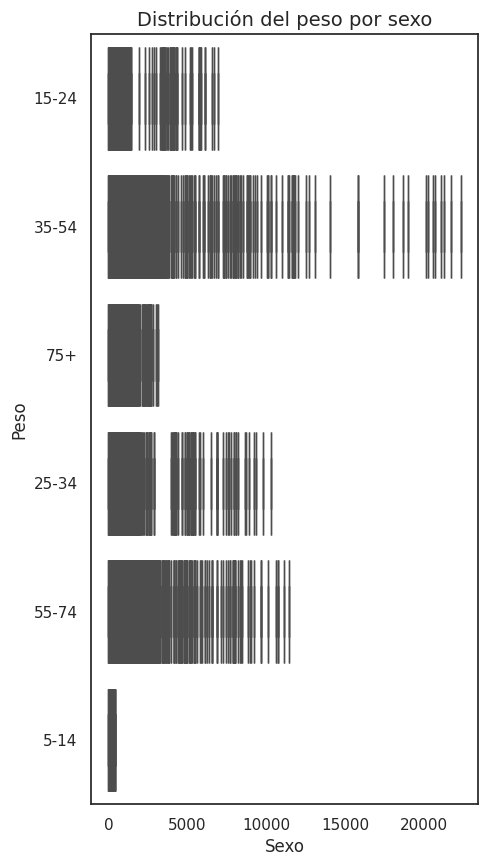

In [78]:
plt.figure(figsize=(5, 10))
# Crea el boxplot con Seaborn y asigna colores
sns.boxplot(data=merged, x='no_suicidios', y='edad', hue='no_suicidios', palette=['blue', 'red'], dodge=False)

# Omitir la leyenda si no es necesaria
plt.legend([],[], frameon=False)

# Añade un título principal al gráfico
plt.title('Distribución del peso por sexo', fontsize=14)

# Añade títulos a los ejes X e Y
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Peso', fontsize=12)

plt.show()

## Correlaciones y Regresión Linear Simple

* Identifica cuáles son las variables numéricas en tu dataset.
* Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
* Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
* Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
* Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
* Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

## Distribuciones muestrales y técnicas de evaluación de modelos

* Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.
* Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:
** La distribución, su asimetría y curtosis
** El error estándar
** El intervalo de confianza que te parezca más apropiado
* Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.


## Visualización de datos avanzada

* Si hay relaciones jerárquicas que quieras hacer claras o si quieres explorar las proporciones de una variable numérica agrupada en múltiples niveles utiliza un treemap.
* Si quieres explorar la relación entre dos variables numéricas divididas por una variable categórica, utiliza scatterplots por categorías o scatterplots con variables condicionantes.
* Si quieres explorar la relación entre dos variables numéricas pero tu dataset es tan grande que es imposible definir las densidades de tus datos, utiliza un binning hexagonal.
* Si quieres explorar datos geográficos, como definir regiones o puntos en un mapa o visualizar una variable numérica que puede segmentarse por regiones geográficas, utiliza un mapa cloroplético.
* Si quieres explorar una variable numérica agrupada en dos niveles por variables categóricas, utiliza una gráfica de barras apiladas.